Nome: Romeu Leite de Araujo Filho
RA: 769713

In [199]:
import numpy as np
import random

In [200]:
'''
O resultado é expresso como um vetor em que cada posição representa a coluna
do tabuleiro e o valor de cada i-ésima posição representa a linha do tabuleiro
'''

otimo = [5, 2, 4, 7, 0, 3, 1, 6]

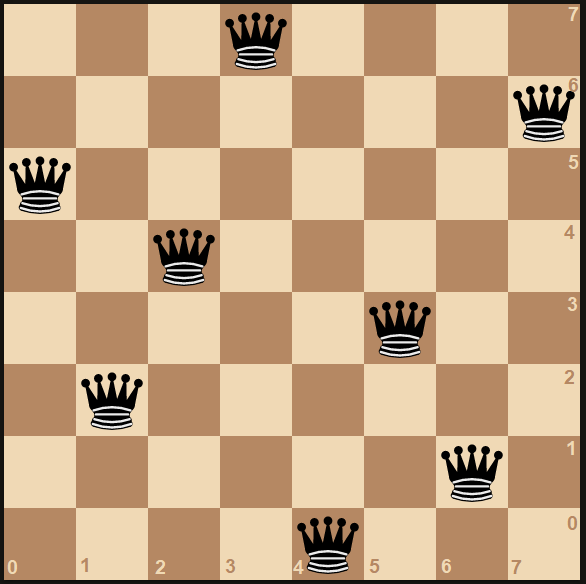

In [201]:
num_individuos = 1000
populacao_inicial = np.zeros((num_individuos,8), dtype=int)

for i in range(num_individuos):
  for j in range(8):
    populacao_inicial[i][j] = random.randint(0,7)

#Exemplo de como os indivíduos são gerados
print(populacao_inicial[:5])


[[3 6 6 3 5 4 6 6]
 [2 0 2 6 4 6 4 5]
 [5 1 3 0 7 6 1 2]
 [4 3 0 3 5 3 7 2]
 [7 0 2 0 3 5 1 2]]


In [202]:
def fitness(ind):
  
  atk = 0 #Número de pares de rainhas que se atacam

  #Rainhas que se atacam em linhas
  atk += len(ind) - len(set(ind))
  
  #Rainhas que se atacam na diagonal
  for i in range(len(ind)):
    for j in range(len(ind)):
      if i != j:
        if abs(i-j) == abs(ind[i] - ind[j]):
          atk += 1

  #28 pares de rainha que não se atacam 
  #8 * 7 / 2 = 28
  return 28 - atk


def retorna_fitness(populacao):
  
  fit = []
  
  for i in range(num_individuos):
    f = fitness(populacao[i])
    fit.append(f)

  return fit

In [203]:
def selecao_torneio(fitnesses):
  
  ind1 = -1
  ind2 = -1

  while ind1 == ind2:
    # Torneio 1
    sorteados = random.sample(range(0, num_individuos), 2)
    if fitnesses[sorteados[0]] > fitnesses[sorteados[1]]:
      ind1 = sorteados[0]
    else:
      ind1 = sorteados[1]

    # Torneio 2
    sorteados = random.sample(range(0, num_individuos), 2)
    if fitnesses[sorteados[0]] > fitnesses[sorteados[1]]:
      ind2 = sorteados[0]
    else:
      ind2 = sorteados[1]  
        
  return ind1,ind2    

In [204]:
#Recombina as características dos pais passando para os filhos
def cruzamento(ids,populacao):
  
  ponto = random.randint(1, 7)

  pai1 = populacao[ids[0]]
  pai2 = populacao[ids[1]]

  filho1 = np.concatenate([pai1[:ponto],pai2[ponto:]])
  filho2 = np.concatenate([pai2[:ponto],pai1[ponto:]])

  return filho1,filho2

In [205]:
#Propaga os dois melhores indivíduos para a próxima geração
def elitismo(fitnesses):

  id1 = fitnesses.index(max(fitnesses))

  fitnesses.pop(id1)
  id2 = fitnesses.index(max(fitnesses))

  return id1,id2

In [206]:
#Garante a diversidade genética alterando a estrutura do indivíduo
def mutacao(filhos, taxa):

  for i in range(len(filhos)):
    if random.random() < taxa:
      pos = random.randint(0, 7)
      filhos[i][pos] = random.randint(0, 7)

  return filhos

In [207]:
# Número de gerações
num_geracoes = 500

# Fitness e peso do indivíduo ótimo
fitness_otimo = fitness(otimo)

for it in range(num_geracoes):

  # Nova populacao vazia
  nova_populacao = np.zeros((num_individuos,8), dtype=int)

  # Calcula o fitness da população
  fit = retorna_fitness(populacao_inicial)
  #print(fit)


  # Imprime o melhor individuo comparado com o ótimo
  id_melhor = fit.index(max(fit))
  print("M:",'  '.join(map(str,populacao_inicial[id_melhor])),fit[id_melhor])
  print("O:",'  '.join(map(str,otimo)),fitness_otimo)
  print()

  #Condição de parada se achar a solução ótima
  if fit[id_melhor] == 28:
    print("Gerações:" + str(it + 1) + '\n')

    #Printa o tabuleiro com a solução encontrada
    print('  a   b   c   d   e   f   g   h' + '\n' + '-' * 33)

    for i in range(7, -1, -1):
      line = '|'
      for j in range(8):
        if populacao_inicial[id_melhor][j] == i:
          square = ' R |'
        else:
          square = '   |'
        line += ''.join(square)
      print(line + str(i+1))
      print('-' * 33)
    break

  # Elitismo
  elite = elitismo(fit.copy()) # Copiando por causa da referencia do vetor
  nova_populacao[0] = populacao_inicial[elite[0]]
  nova_populacao[1] = populacao_inicial[elite[1]]

  # Gera os filhos restantes para completar a população
  num_filhos = 2
  while num_filhos < num_individuos:

    # Seleção por torneio
    ind_vencedores = selecao_torneio(fit)
    
    # Cruzamento
    filhos = cruzamento(ind_vencedores,populacao_inicial)

    # Mutacao (50% de chance de mutação em cada indivíduo)
    filhos = mutacao(filhos,0.5)

    # Coloca os filhos na nova população
    nova_populacao[num_filhos] = filhos[0]
    nova_populacao[num_filhos+1] = filhos[1]

    # Aumenta o número de filhod
    num_filhos = num_filhos + 2

  # Substitui a populacao antiga pela atual
  populacao_inicial = nova_populacao.copy()

M: 0  3  0  4  1  1  5  1 25
O: 5  2  4  7  0  3  1  6 28

M: 4  6  1  3  7  0  7  1 26
O: 5  2  4  7  0  3  1  6 28

M: 4  6  1  3  7  0  7  1 26
O: 5  2  4  7  0  3  1  6 28

M: 4  6  1  3  7  0  7  1 26
O: 5  2  4  7  0  3  1  6 28

M: 4  6  1  3  7  0  7  5 27
O: 5  2  4  7  0  3  1  6 28

M: 4  6  1  3  7  0  7  5 27
O: 5  2  4  7  0  3  1  6 28

M: 4  6  1  3  7  0  7  5 27
O: 5  2  4  7  0  3  1  6 28

M: 4  6  1  3  7  0  2  5 28
O: 5  2  4  7  0  3  1  6 28

Gerações:8

  a   b   c   d   e   f   g   h
---------------------------------
|   |   |   |   | R |   |   |   |8
---------------------------------
|   | R |   |   |   |   |   |   |7
---------------------------------
|   |   |   |   |   |   |   | R |6
---------------------------------
| R |   |   |   |   |   |   |   |5
---------------------------------
|   |   |   | R |   |   |   |   |4
---------------------------------
|   |   |   |   |   |   | R |   |3
---------------------------------
|   |   | R |   |   |   |   |   |2
-